In [1]:
! pip install statannotations

  Using cached statannotations-0.6.0-py3-none-any.whl (32 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.8 MB/s eta 0:00:0000:010:01
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 37.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 29.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.8 MB/s eta 0:00:00:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 11.0 MB/s eta 0:00:00
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip available: 22.3.1 -> 23.3

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['figure.dpi'] = 300
sns.set_style("dark")

# Main Findings

In [4]:
data = pd.read_csv("../data/btqe_raw_data.csv")

In [5]:
data.head()

,Condition,ResponseId,Baseline_1,Baseline_confidence_1,Baseline_2,Baseline_confidence_2,Baseline_3,Baseline_confidence_3,Baseline_4,Baseline_confidence_4,...,Experiment_comprehension_25,Experiment_26,Experiment_confidence_26,Experiment_comprehension_26,Experiment_27,Experiment_confidence_27,Experiment_comprehension_27,Experiment_28,Experiment_confidence_28,Experiment_comprehension_28
0,BT,R_ywmQslnoumhFBPb,No,5,No,5,No,5,No,5,...,2,No,5,1,No,5,1,No,5,3
1,BT,R_1qakZ5kxkgplkUJ,Yes,2,Yes,2,No,2,No,2,...,2,Yes,2,2,Yes,3,3,No,3,2
2,BT,R_9nownq2eTzhSTRf,Yes,1,Yes,1,Yes,1,Yes,1,...,4,No,4,1,Yes,3,4,No,4,1
3,BT,R_3OiEMcdx8l3Q381,No,1,No,1,No,1,No,1,...,2,No,5,1,No,5,1,No,5,1
4,BT,R_2qyLFF9jJTxohh4,No,1,No,1,No,1,No,1,...,1,No,1,1,No,1,1,No,1,1


In [6]:
correct_answers = ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']
clinical_risk = ["mildly significant", "moderately significant", "mildly significant", "moderately significant", "moderately significant", "mildly significant", "mildly significant", "mildly significant", "clinically insignificant", "mildly significant", "clinically insignificant", "clinically insignificant", "mildly significant",  "clinically insignificant", "clinically insignificant", "clinically insignificant", "highly significant", "mildly significant", "clinically insignificant", "moderately significant", "clinically insignificant", "clinically insignificant", "moderately significant", "clinically insignificant", "moderately significant", "life-threatening", "clinically insignificant", "highly significant"]

In [7]:
from collections import Counter
Counter(correct_answers)

Counter({'Yes': 15, 'No': 13})

# Main Finding 1

In [ ]:
# Correct Reliance - Physician say yes/no and answer is yes/no
# Incorrect Reliance - Physician say no/yes and answer is yes/no

In [8]:
def correct_answers_mean(data, correct_answers, val=None):
  if val == None:
    count_column = data.eq(correct_answers).mean(axis=1)
  else:
    # select only yes or no
    select_correct_answers = [x==val for x in correct_answers]
    count_column = (data.eq(correct_answers) & select_correct_answers).mean(axis=1)
  return count_column

In [9]:
data["Baseline (Accuracy)"] = correct_answers_mean(data[["Baseline_{}".format(i) for i in range(1, 29)]], correct_answers) *100
data["Experiment (Accuracy)"] = correct_answers_mean(data[["Experiment_{}".format(i) for i in range(1, 29)]], correct_answers) *100

In [10]:
# by physician - sanity check
for group_name, group_df in data[["Condition", "Experiment (Accuracy)", "Baseline (Accuracy)"]].groupby("Condition"):
  print(group_name, group_df.mean(axis=0))

BT Experiment (Accuracy)    55.408163
Baseline (Accuracy)      56.224490
dtype: float64
QE Experiment (Accuracy)    61.309524
Baseline (Accuracy)      57.142857
dtype: float64


/tmp/ipykernel_48413/3796168939.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(group_name, group_df.mean(axis=0))
/tmp/ipykernel_48413/3796168939.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(group_name, group_df.mean(axis=0))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:7.340e-02 t=-1.823e+00
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:6.994e-01 t=3.878e-01
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:6.946e-01 t=-3.944e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:5.553e-03 t=-2.872e+00


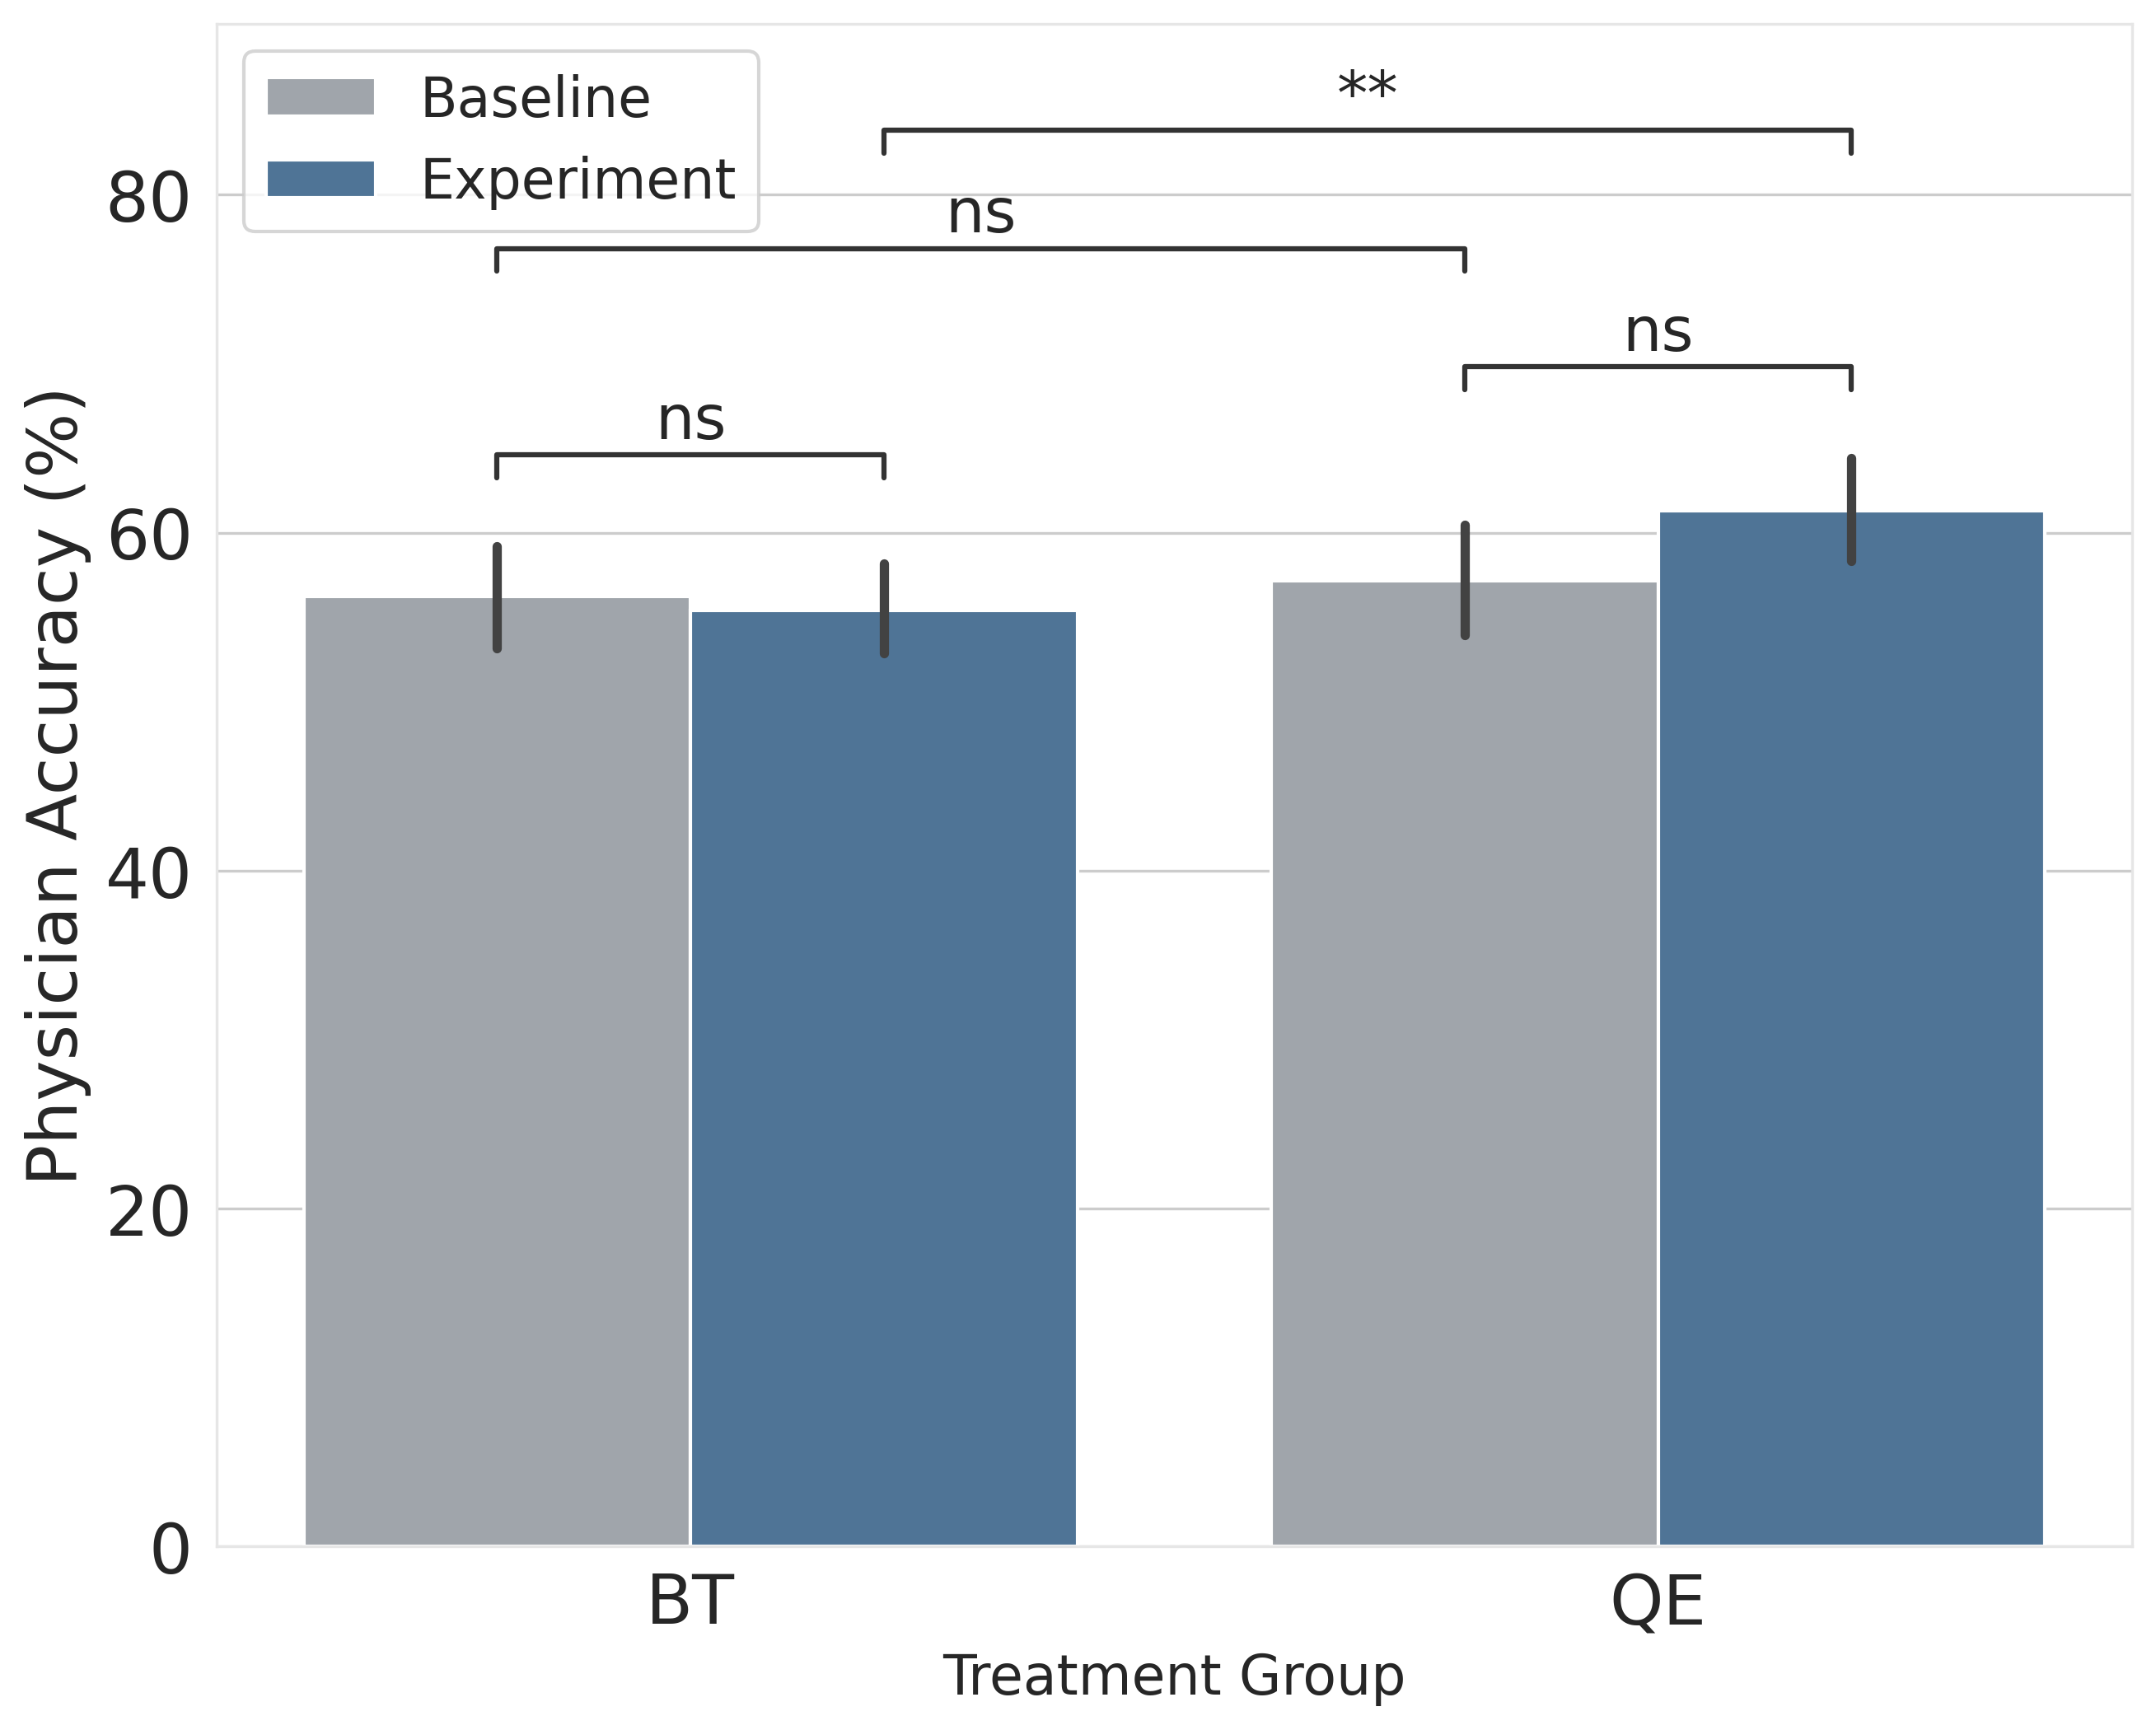

In [21]:
from statannotations.Annotator import Annotator

sub_data = data[["Condition", "Baseline (Accuracy)", "Experiment (Accuracy)"]]
sub_data.columns = ["Condition", "Baseline", "Experiment"]

accuracy_phy_df = pd.melt(
    sub_data,
    id_vars=["Condition"],
    var_name="Group",
    value_name="Accuracy"
)

plt.figure(figsize=(10, 8))
clrs = ['#9ea5ad', '#4374a2', '#9ea5ad', '#d68121']
ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Accuracy', hue='Group', palette=clrs)

pairs = [((xval, "Baseline"), (xval, "Experiment")) for xval in ["BT", "QE"]]
pairs += [(("BT", yval), ("QE", yval)) for yval in ["Baseline", "Experiment"]]

annotator = Annotator(ax, pairs, data=accuracy_phy_df, x="Condition", y="Accuracy", hue="Group", order=["BT", "QE"])
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator._pvalue_format.fontsize = 18
annotator.apply_and_annotate()

plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.xticks(fontsize=20)

plt.xlabel(xlabel="Treatment Group", fontsize=16)
plt.ylabel(ylabel="Physician Accuracy (%)",fontsize=20)
plt.show()

# Main Finding - Weighted Accuracy

In [11]:
from scipy import stats
from statannotations.Annotator import Annotator

In [12]:
# weighted scoring - From Niloufar's code
def calculate_overall_score(data, correct_answer, confidence_data):
    overall_score = pd.Series(0, index=data.index)  # Initialize overall score to zero
    for idx, row in data.iterrows():  # Iterate over each row
        i = 0
        for col in row.index:
            if row[col] == correct_answer[i]:  # Check condition
                overall_score[idx] += confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Add to overall score
            else:
                overall_score[idx] -= confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Subtract from overall score
            i += 1
    return overall_score

In [13]:
# confidence weighted count

data["Baseline (Weighted Score)"] = calculate_overall_score(data[["Baseline_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Baseline_confidence_{}".format(i) for i in range(1, 29)]])
data["Experiment (Weighted Score)"] = calculate_overall_score(data[["Experiment_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Experiment_confidence_{}".format(i) for i in range(1, 29)]])

# confidence weighted accuracy

data[f"Baseline (Weighted Accuracy)"] = (100*data[f"Baseline (Weighted Score)"])/28
data[f"Experiment (Weighted Accuracy)"] = (100*data[f"Experiment (Weighted Score)"])/28

In [14]:
data.head()

,Condition,ResponseId,Baseline_1,Baseline_confidence_1,Baseline_2,Baseline_confidence_2,Baseline_3,Baseline_confidence_3,Baseline_4,Baseline_confidence_4,...,Experiment_comprehension_27,Experiment_28,Experiment_confidence_28,Experiment_comprehension_28,Baseline (Accuracy),Experiment (Accuracy),Baseline (Weighted Score),Experiment (Weighted Score),Baseline (Weighted Accuracy),Experiment (Weighted Accuracy)
0,BT,R_ywmQslnoumhFBPb,No,5,No,5,No,5,No,5,...,1,No,5,3,46.428571,46.428571,-2.0,-2.0,-7.142857,-7.142857
1,BT,R_1qakZ5kxkgplkUJ,Yes,2,Yes,2,No,2,No,2,...,3,No,3,2,57.142857,50.000000,2.0,1.0,7.142857,3.571429
2,BT,R_9nownq2eTzhSTRf,Yes,1,Yes,1,Yes,1,Yes,1,...,4,No,4,1,53.571429,60.714286,0.4,3.0,1.428571,10.714286
3,BT,R_3OiEMcdx8l3Q381,No,1,No,1,No,1,No,1,...,1,No,5,1,46.428571,50.000000,-0.4,0.6,-1.428571,2.142857
4,BT,R_2qyLFF9jJTxohh4,No,1,No,1,No,1,No,1,...,1,No,1,1,46.428571,42.857143,-0.4,-0.8,-1.428571,-2.857143


In [15]:
data[["Condition", "Baseline (Weighted Accuracy)",  "Experiment (Weighted Accuracy)"]].groupby("Condition").mean()

,Baseline (Weighted Accuracy),Experiment (Weighted Accuracy)
Condition,,
BT,7.938776,8.693878
QE,11.261905,19.642857


In [16]:
data[["Condition", "Baseline (Weighted Accuracy)", "Experiment (Weighted Accuracy)"]].groupby("Condition").std()

,Baseline (Weighted Accuracy),Experiment (Weighted Accuracy)
Condition,,
BT,11.631305,11.486834
QE,15.646611,14.018122


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:3.293e-02 t=-2.185e+00
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:7.855e-01 t=-2.733e-01
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:3.308e-01 t=-9.801e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:9.716e-04 t=-3.461e+00


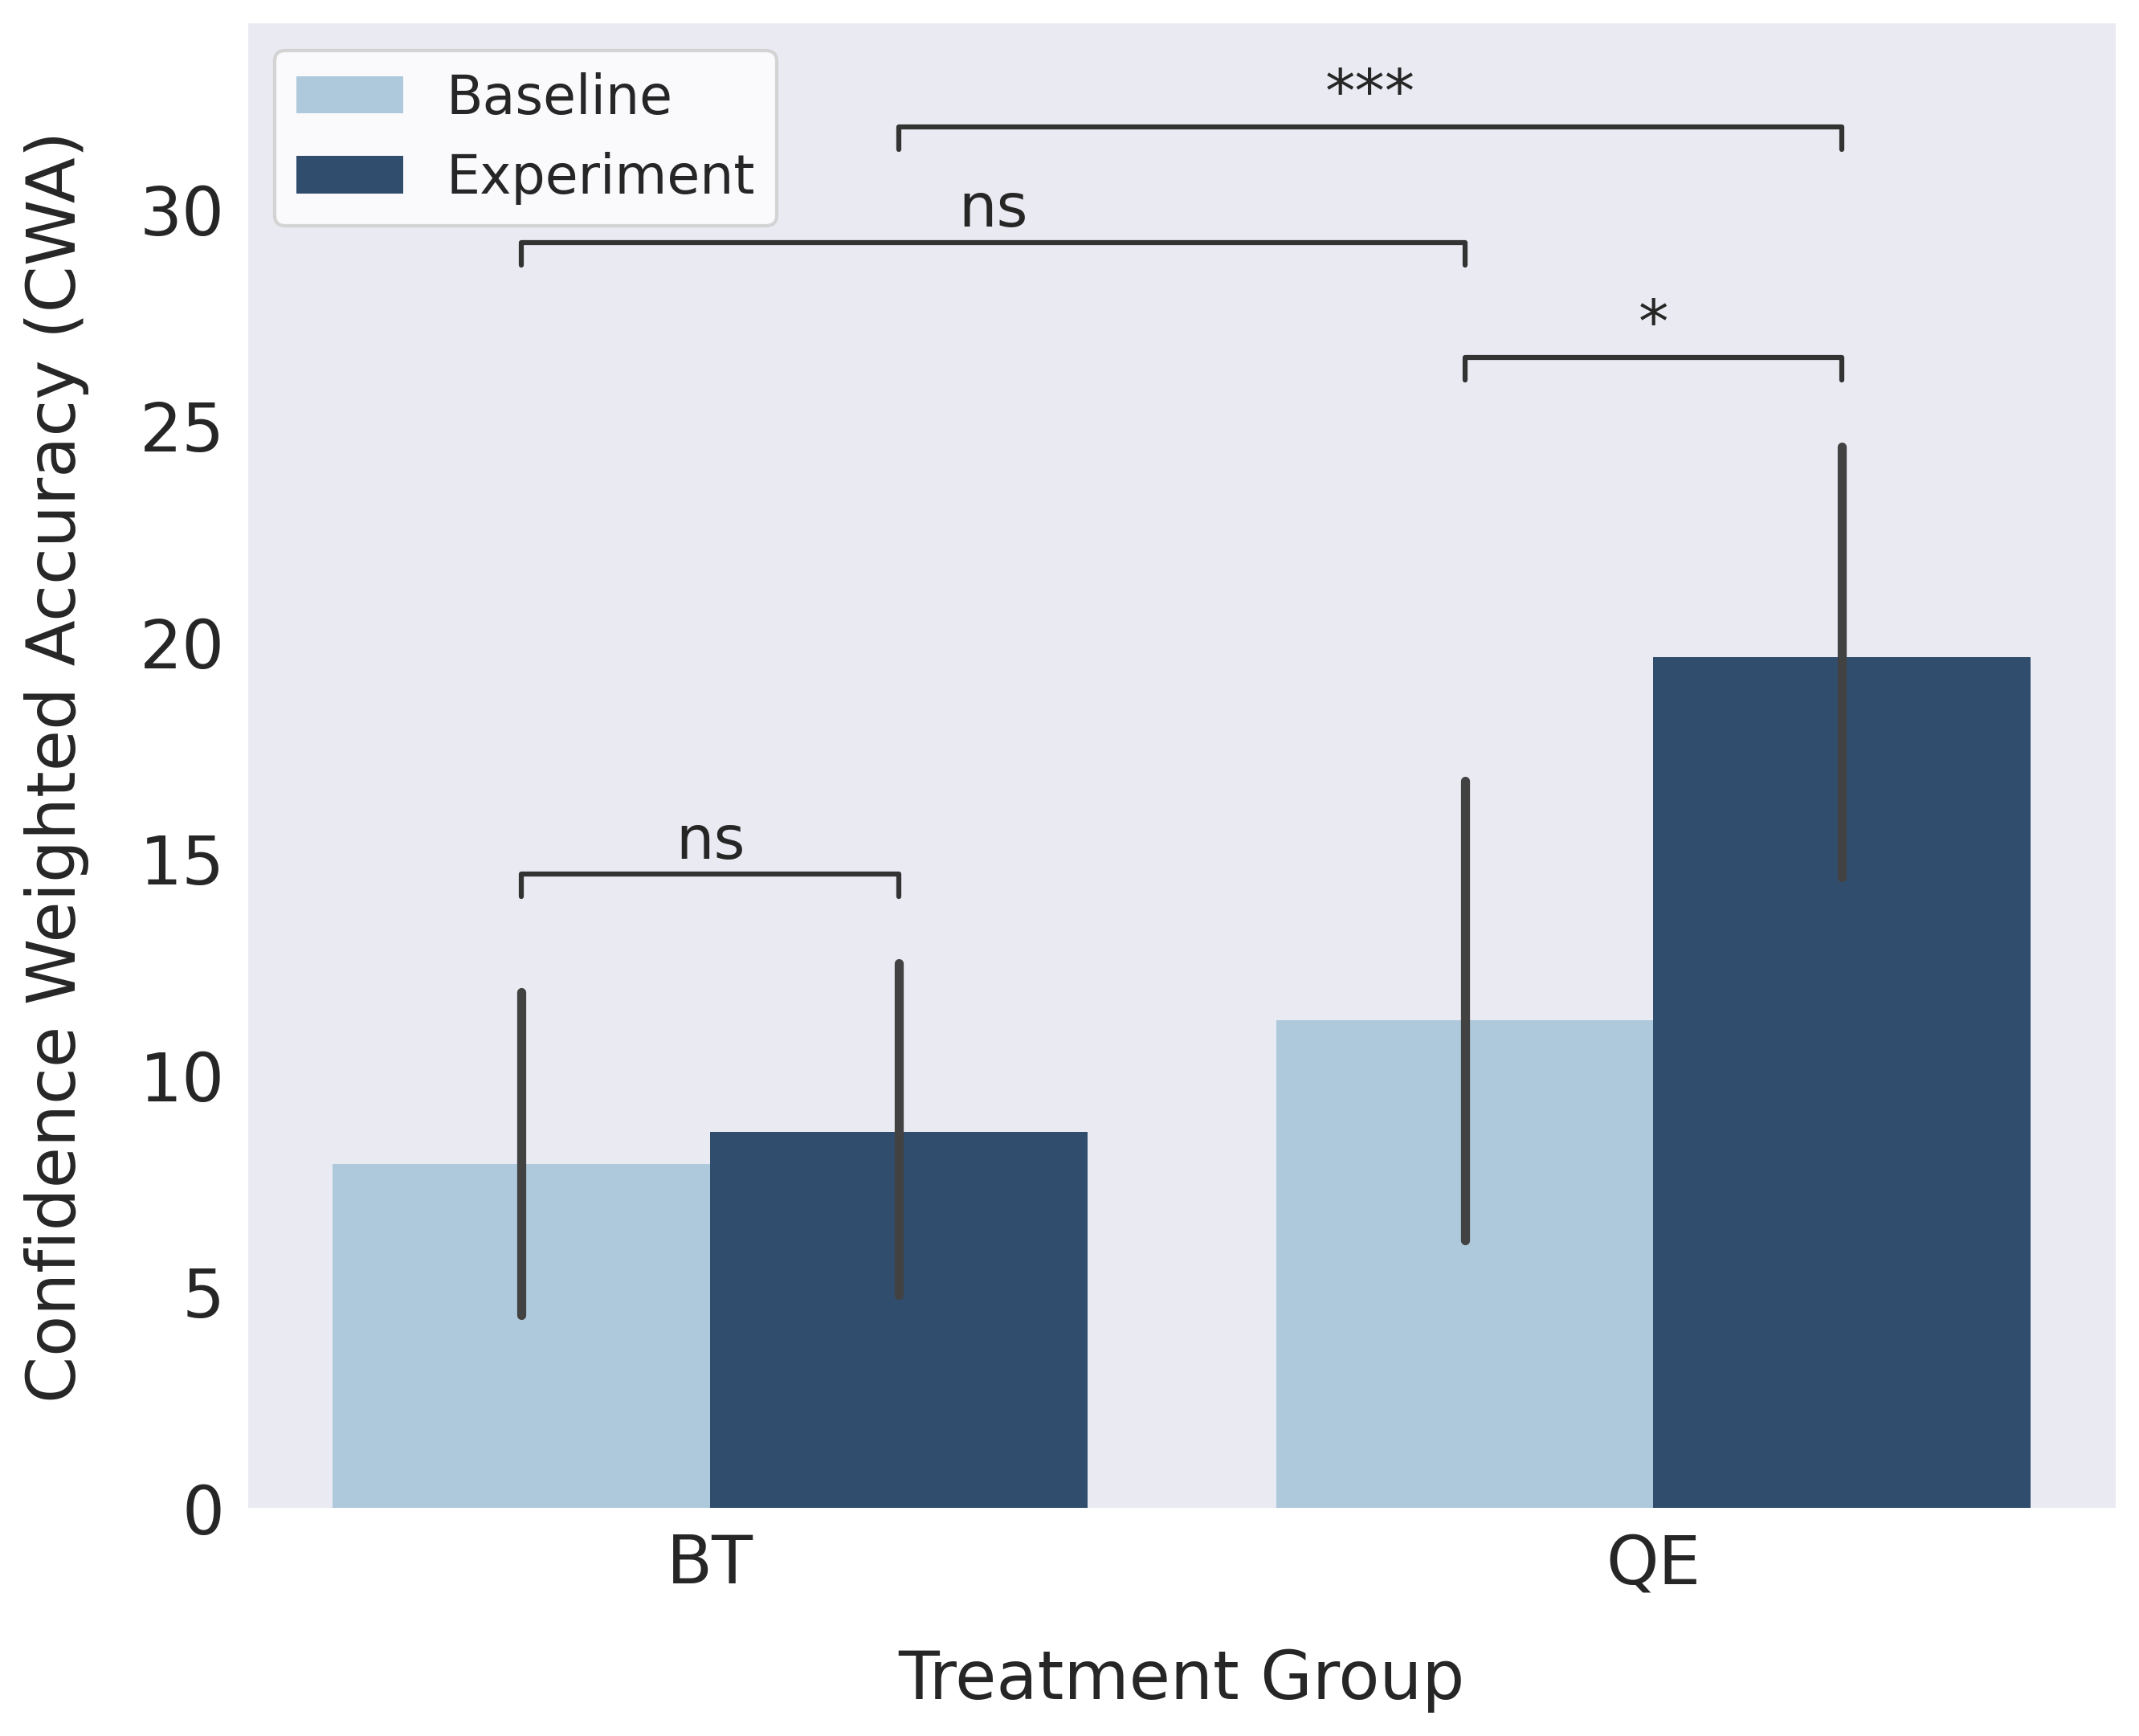

In [17]:
from statannotations.Annotator import Annotator

sub_data = data[["Condition", "Baseline (Weighted Accuracy)", "Experiment (Weighted Accuracy)"]]
sub_data.columns = ["Condition", "Baseline", "Experiment"]

accuracy_phy_df = pd.melt(
    sub_data,
    id_vars=["Condition"],
    var_name="Group",
    value_name="Weighted Accuracy"
)

plt.figure(figsize=(10, 8))
#clrs = ['#9ea5ad', '#4374a2', '#9ea5ad', '#d68121']
modern_blues = ['#a6cbe3', '#274c77']
#ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Weighted Accuracy', hue='Group', palette=clrs)
ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Weighted Accuracy', hue='Group', palette=modern_blues, linewidth=0)
sns.set_style("whitegrid", {'axes.edgecolor': '0.9'})
legend = ax.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Group", title_fontsize=18, fontsize=16)
legend.get_frame().set_linewidth(0.0)
sns.despine(left=True, bottom=True, right=True)
ax.set_xlabel("Treatment Group", fontsize=20, labelpad=15)
ax.set_ylabel("Confidence Weighted Accuracy (CWA)", fontsize=20, labelpad=15)

pairs = [((xval, "Baseline"), (xval, "Experiment")) for xval in ["BT", "QE"]]
pairs += [(("BT", yval), ("QE", yval)) for yval in ["Baseline", "Experiment"]]

annotator = Annotator(ax, pairs, data=accuracy_phy_df, x="Condition", y="Weighted Accuracy", hue="Group", order=["BT", "QE"])
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator._pvalue_format.fontsize = 18
annotator.apply_and_annotate()

plt.yticks(fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.xticks(fontsize=20)

#plt.xlabel(xlabel="Treatment Group", fontsize=16)
#plt.ylabel(ylabel="Confidence Weighted Accuracy (CWA)",fontsize=20)
plt.show()

In [18]:
# weighted scoring - From Niloufar's code
def calculate_answer_specific_score(data, correct_answer, confidence_data, answer):
    overall_score = pd.Series(0, index=data.index)  # Initialize overall score to zero
    for idx, row in data.iterrows():  # Iterate over each row
        i = 0
        for col in row.index:
          if (correct_answer[i] == answer):
            if (row[col] == correct_answer[i]):  # Check condition
                overall_score[idx] += confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Add to overall score
            else:
                overall_score[idx] -= confidence_data.loc[idx, col.replace("_", "_confidence_")]/5  # Subtract from overall score
          i += 1
    return overall_score

In [22]:
from collections import Counter
count_ans = Counter(correct_answers)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:4.182e-02 t=-2.081e+00
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:2.723e-01 t=1.107e+00
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:5.898e-01 t=-5.418e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:4.327e-05 t=-4.396e+00


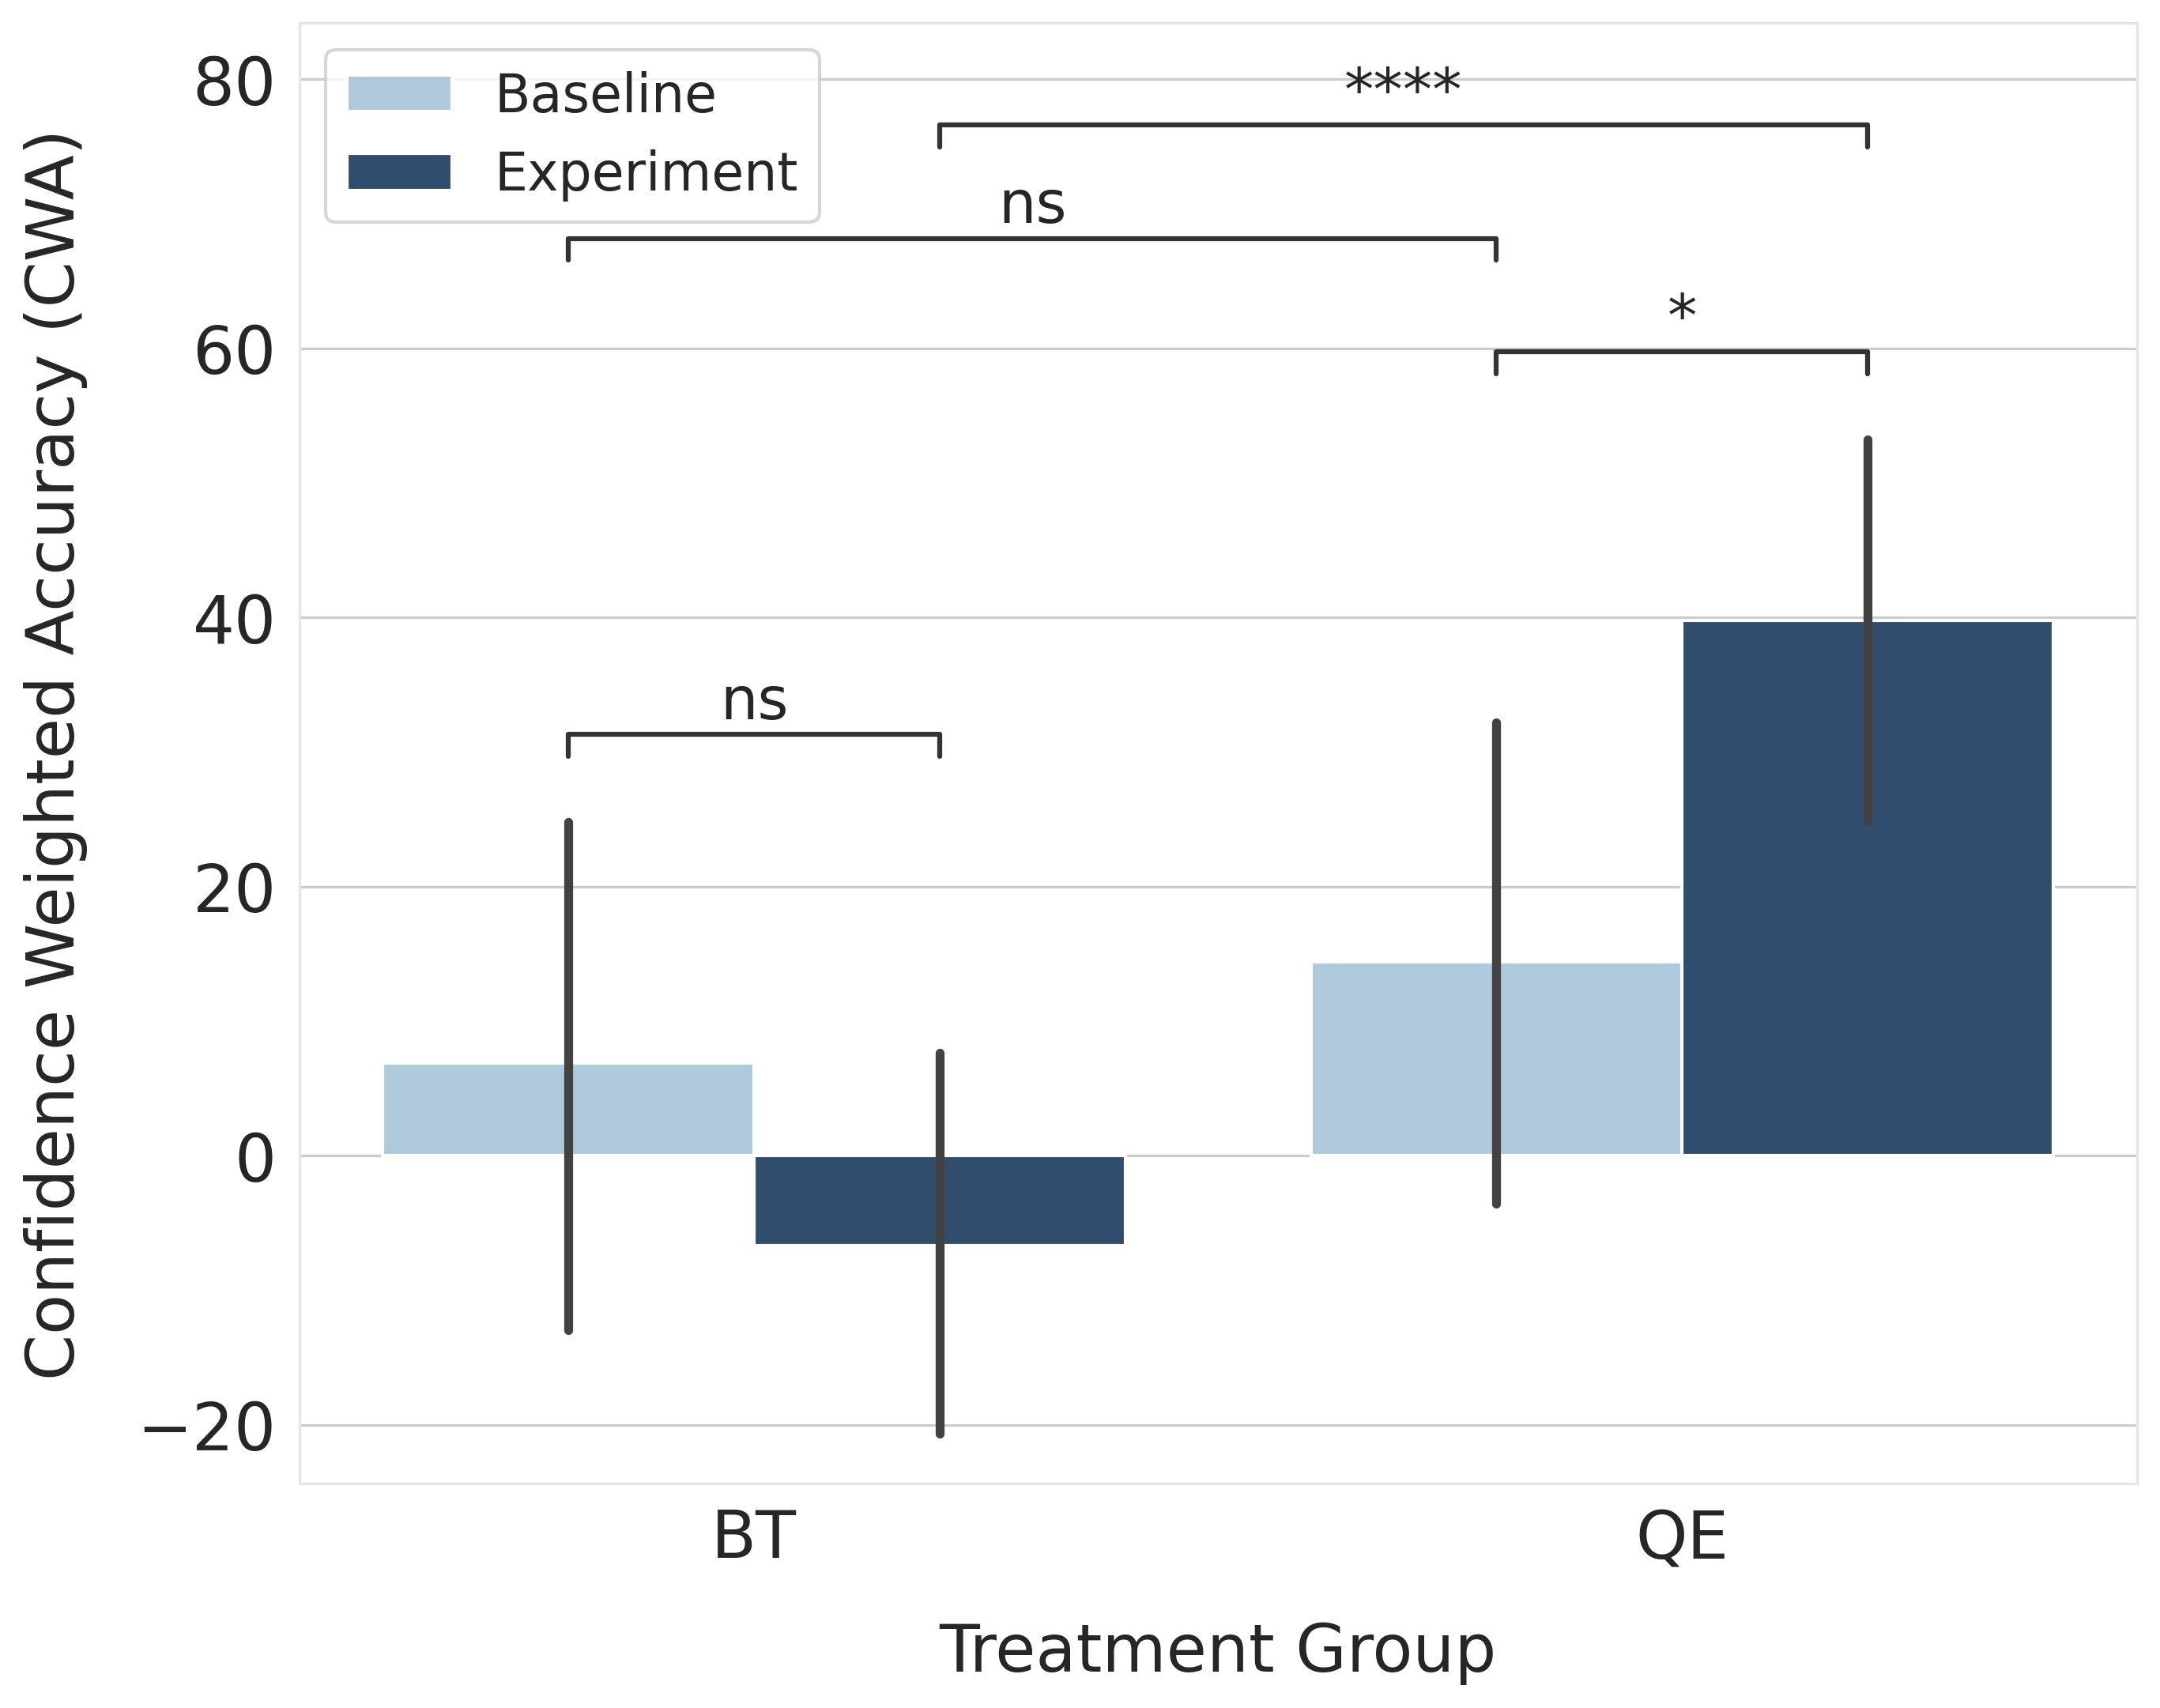

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

QE_Baseline vs. QE_Experiment: t-test independent samples, P_val:3.770e-01 t=8.902e-01
BT_Baseline vs. BT_Experiment: t-test independent samples, P_val:1.069e-01 t=-1.634e+00
BT_Baseline vs. QE_Baseline: t-test independent samples, P_val:9.076e-01 t=1.165e-01
BT_Experiment vs. QE_Experiment: t-test independent samples, P_val:4.003e-03 t=2.988e+00


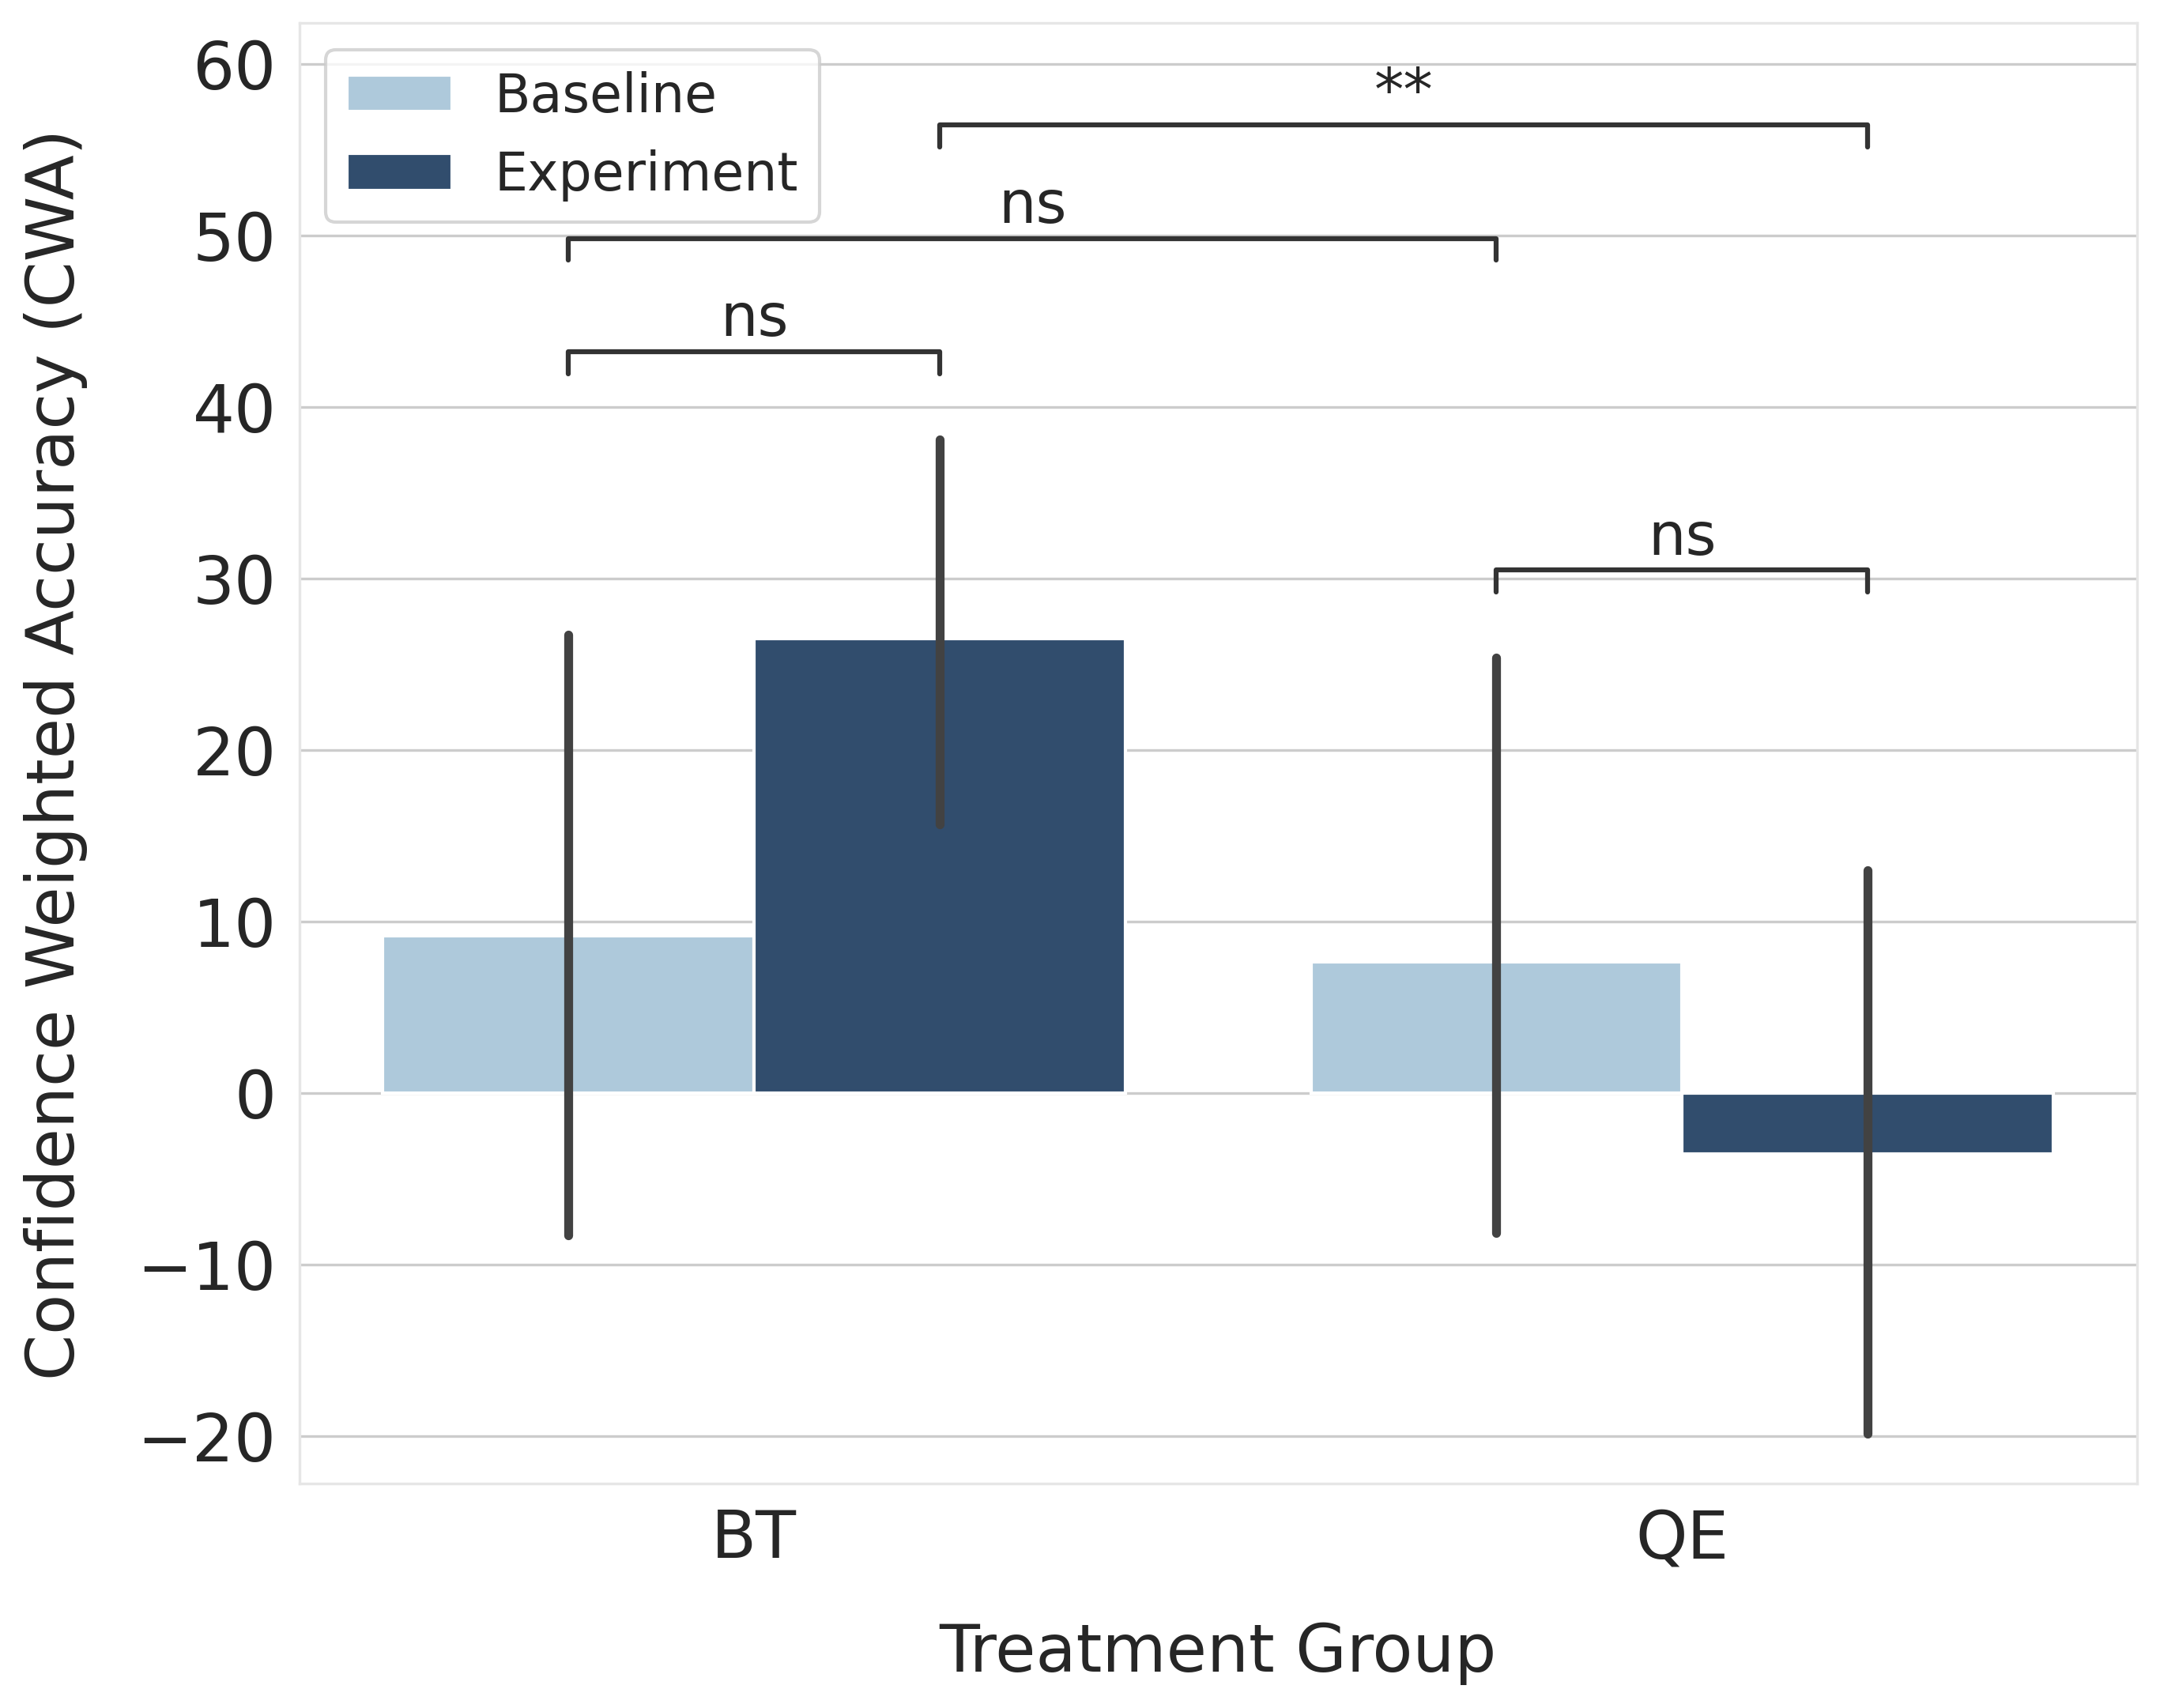

In [23]:
# reliance on adequate and inadequate translations
for ans in ["Yes", "No"]:
  data[f"Baseline {ans} (Weighted Score)"] = calculate_answer_specific_score(data[["Baseline_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Baseline_confidence_{}".format(i) for i in range(1, 29)]], ans)
  data[f"Experiment {ans} (Weighted Score)"]  = calculate_answer_specific_score(data[["Experiment_{}".format(i) for i in range(1, 29)]], correct_answers, data[["Experiment_confidence_{}".format(i) for i in range(1, 29)]], ans)

  data[f"Baseline {ans} (Weighted Accuracy)"] = (100*data[f"Baseline {ans} (Weighted Score)"])/count_ans[ans]
  data[f"Experiment {ans} (Weighted Accuracy)"] = (100*data[f"Experiment {ans} (Weighted Score)"])/count_ans[ans]

  sub_data = data[["Condition", f"Baseline {ans} (Weighted Accuracy)", f"Experiment {ans} (Weighted Accuracy)"]]
  sub_data.columns = ["Condition", "Baseline", "Experiment"]

  accuracy_phy_df = pd.melt(
      sub_data,
      id_vars=["Condition"],
      var_name="Group",
      value_name="Weighted Accuracy"
  )

  plt.figure(figsize=(10, 8))
  #clrs = ['#9ea5ad', '#4374a2', '#9ea5ad', '#d68121']
  modern_blues = ['#a6cbe3', '#274c77']
  ax = sns.barplot(data=accuracy_phy_df, x='Condition', y='Weighted Accuracy', hue='Group', palette=modern_blues)
  ax.set_xlabel("Treatment Group", fontsize=20, labelpad=15)
  ax.set_ylabel("Confidence Weighted Accuracy (CWA)", fontsize=20, labelpad=15)

  pairs = [((xval, "Baseline"), (xval, "Experiment")) for xval in ["BT", "QE"]]
  pairs += [(("BT", yval), ("QE", yval)) for yval in ["Baseline", "Experiment"]]

  annotator = Annotator(ax, pairs, data=accuracy_phy_df, x="Condition", y="Weighted Accuracy", hue="Group", order=["BT", "QE"])
  annotator.configure(test='t-test_ind', text_format='star', loc='inside')
  annotator._pvalue_format.fontsize = 18
  annotator.apply_and_annotate()

  plt.yticks(fontsize=20)
  plt.legend(loc=2, prop={'size': 16})
  plt.xticks(fontsize=20)

  #plt.xlabel(xlabel="Treatment Group", fontsize=16)
  #plt.ylabel(ylabel="Confidence Weighted Accuracy (CWA)",fontsize=20)
  plt.show()

# Risk

In [24]:
# by sentence
sentence_accuracy = []
for group_name, group_df in data.groupby("Condition"):
  for i in range(1, 29):
    correct_ans_sent = correct_answers[i-1]
    experiment_ans = dict(group_df[f"Experiment_{i}"].value_counts())
    mean_confidence_correct = group_df[group_df[f"Experiment_{i}"] == correct_ans_sent][f"Experiment_confidence_{i}"].mean()
    if group_name=="BT":
      correct_percent = experiment_ans[correct_ans_sent]/35
    else:
      correct_percent = experiment_ans[correct_ans_sent]/30
    sentence_accuracy.append([group_name, i, correct_percent, mean_confidence_correct, correct_ans_sent, clinical_risk[i-1]])

sentence_df = pd.DataFrame(sentence_accuracy)
sentence_df.columns = ["Condition", "Sentence Id", "Physician Accuracy (%)", "Physician Confidence", "Adequate?", "Clinical Risk"]
sentence_df[ "Physician Accuracy (%)"] = sentence_df[ "Physician Accuracy (%)"] *100

In [25]:
from scipy import stats
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the font globally
sns.set(font="DejaVu Sans")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Modern Blues Color Palette
modern_blues = ['#a6cbe3', '#274c77']

xlabel = 'Clinical Risk'
ylabel = 'Physician Accuracy (%)'
sub_df = sentence_df
sub_df["Clinical Risk"] = sub_df["Clinical Risk"].str.replace("clinically insignificant", "insignificant")
figsize = (26, 10)  # Slightly reduced for better fit
order = ['life-threatening', 'highly significant', 'moderately significant', 'mildly significant', 'insignificant']
fontsize = 26

# Set the white grid style for the plot
sns.set_style("whitegrid", {'axes.edgecolor': '0.9'})

plt.figure(figsize=figsize)
ax = sns.boxplot(data=sub_df, x=xlabel, y=ylabel, hue="Condition", order=order, palette=modern_blues, linewidth=0.7, fliersize=5)

pairs = [((xval, "BT"), (xval, "QE")) for xval in order]
annotator = Annotator(ax, pairs, data=sub_df, x=xlabel, y=ylabel, hue="Condition", order=order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator._pvalue_format.fontsize = 24
annotator.apply_and_annotate()

# Remove unnecessary spines
sns.despine(bottom=True, left=True)

# Update font sizes for ticks, labels, and legend
ax.set_xlabel(xlabel, fontsize=fontsize-4, labelpad=15)
ax.set_ylabel(ylabel, fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize-4, length=0)
legend = ax.legend(loc="upper right", title="Condition", title_fontsize=fontsize, fontsize=fontsize-6)
legend.get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.show()


/fs/clip-xling/projects/PhysicianQE/PhysicianQE/.qe_phy/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

highly significant_BT vs. highly significant_QE: t-test independent samples, P_val:2.982e-02 t=5.660e+00
life-threatening_BT vs. life-threatening_QE: t-test independent samples, P_val:nan t=nan
moderately significant_BT vs. moderately significant_QE: t-test independent samples, P_val:2.335e-02 t=2.673e+00
mildly significant_BT vs. mildly significant_QE: t-test independent samples, P_val:3.103e-01 t=-1.053e+00
insignificant_BT vs. insignificant_QE: t-test independent samples, P_val:2.021e-04 t=-4.534e+00
